# 1. Objective

- Design a **predictive model to determine potential customers who will make a purchase if we send them advertisements.** The target variable is `Potential_Customer`. 

## 1.1 Import packages and data

In [50]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

# preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA

# modelling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

# model evaluation

from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score, \
                                RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# to create model object
import pickle

In [51]:
df = pd.read_csv('data.csv', na_filter = True)

In [52]:
df.shape

(4469, 25)

In [5]:
df.head()

Potential_Customer    C_ID Cust_Last_Purchase  Pur_3_years  Pur_5_years  \
0                   1    9946             $5.00             2           17   
1                   1   87939            $30.00             1            7   
2                   0   88003                NaN            5           12   
3                   1  188721            $20.00             1           11   
4                   1   88056             $5.00             3           15   

   Pur_3_years_Indirect  Pur_5_years_Indirect Pur_latest Pur_3_years_Avg  \
0                     2                     4     $0.00           $7.50    
1                     0                     3    $25.00          $25.00    
2                     3                     5    $15.00          $15.00    
3                     0                     3    $20.00          $20.00    
4                     2                     7     $3.00           $4.33    

  Pur_5_years_Avg Pur_3_years_Avg_Indirect  InAct_Last  InAct_First  \
0          $7.76                    $7.50           14          110   
1         $13.00                       NaN          18           75   
2         $11.25                   $14.67           19           57   
3         $12.45                       NaN           5          113   
4          $3.80                    $4.00           17          118   

   Ad_Res_1_year  Ad_Res_3_Year  Ad_Res_5_Year  Ad_Res_Ind_1_Year  \
0             32             48             73                  3   
1             13             35             55                  6   
2             14             35             53                  6   
3             17             38             71                  8   
4             13             28             63                  6   

   Ad_Res_Ind_3_Year  Ad_Res_Ind_5_Year Status_Cust  Status_Latest_Ad   Age  \
0                 12                 16           A                 0 71.00   
1                  6                 22           A                 1  7.00   
2                 17                 22           S                 1 79.00   
3                  8                 33           A                 0 73.00   
4                 12                 24           S                 1 68.00   

  Gender Cust_Prop Cust_Ann_Income  
0      F         H     $65,957.00   
1      M         U          $0.00   
2      F         U          $0.00   
3      F         U     $76,293.00   
4      F         H    $113,663.00

# 2. Data Cleaning

## 2.1 Check for correct data types

We notice that several columns (e.g., `Potential_Customer`,`Status_Cust`, `Status_Latest_Ad`,`C_ID`, `Gender`, `Cust_Prop`) have the wrong data types. They ought to be `categorical` data but are instead of the `object`/`integer`/`float` data type. Additionally, several columns have values with `$` signs.  Hence, we'll adjust this. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

### 2.1.1 Remove the dollar sign and comma from data

In [53]:
df.Cust_Last_Purchase=df.Cust_Last_Purchase.str.replace('$', '')
df.Pur_latest=df.Pur_latest.str.replace('$', '')
df.Pur_3_years_Avg=df.Pur_3_years_Avg.str.replace('$', '')
df.Pur_5_years_Avg=df.Pur_5_years_Avg.str.replace('$', '')
df.Pur_3_years_Avg_Indirect=df.Pur_3_years_Avg_Indirect.str.replace('$', '')
df.Cust_Ann_Income=df.Cust_Ann_Income.str.replace('$', '')
df.Cust_Ann_Income=df.Cust_Ann_Income.str.replace(',', '')

### 2.1.2 Correct data types

In [8]:
df.head()

Potential_Customer    C_ID Cust_Last_Purchase  Pur_3_years  Pur_5_years  \
0                   1    9946              5.00             2           17   
1                   1   87939             30.00             1            7   
2                   0   88003                NaN            5           12   
3                   1  188721             20.00             1           11   
4                   1   88056              5.00             3           15   

   Pur_3_years_Indirect  Pur_5_years_Indirect Pur_latest Pur_3_years_Avg  \
0                     2                     4      0.00            7.50    
1                     0                     3     25.00           25.00    
2                     3                     5     15.00           15.00    
3                     0                     3     20.00           20.00    
4                     2                     7      3.00            4.33    

  Pur_5_years_Avg Pur_3_years_Avg_Indirect  InAct_Last  InAct_First  \
0           7.76                     7.50           14          110   
1          13.00                       NaN          18           75   
2          11.25                    14.67           19           57   
3          12.45                       NaN           5          113   
4           3.80                     4.00           17          118   

   Ad_Res_1_year  Ad_Res_3_Year  Ad_Res_5_Year  Ad_Res_Ind_1_Year  \
0             32             48             73                  3   
1             13             35             55                  6   
2             14             35             53                  6   
3             17             38             71                  8   
4             13             28             63                  6   

   Ad_Res_Ind_3_Year  Ad_Res_Ind_5_Year Status_Cust  Status_Latest_Ad   Age  \
0                 12                 16           A                 0 71.00   
1                  6                 22           A                 1  7.00   
2                 17                 22           S                 1 79.00   
3                  8                 33           A                 0 73.00   
4                 12                 24           S                 1 68.00   

  Gender Cust_Prop Cust_Ann_Income  
0      F         H       65957.00   
1      M         U           0.00   
2      F         U           0.00   
3      F         U       76293.00   
4      F         H      113663.00

In [54]:
CatCols=['Potential_Customer','Status_Cust', 'Status_Latest_Ad','C_ID',
         'Gender', 'Cust_Prop']
NumCols=list(set(df.columns)-set(CatCols))

df[CatCols] = df[CatCols].apply(lambda x: x.astype('category'))
df[NumCols] = df[NumCols].apply(lambda x: x.astype('float64'))

# final check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        4469 non-null   category
 1   C_ID                      4469 non-null   category
 2   Cust_Last_Purchase        2149 non-null   float64 
 3   Pur_3_years               4469 non-null   float64 
 4   Pur_5_years               4469 non-null   float64 
 5   Pur_3_years_Indirect      4469 non-null   float64 
 6   Pur_5_years_Indirect      4469 non-null   float64 
 7   Pur_latest                4469 non-null   float64 
 8   Pur_3_years_Avg           4469 non-null   float64 
 9   Pur_5_years_Avg           4469 non-null   float64 
 10  Pur_3_years_Avg_Indirect  3642 non-null   float64 
 11  InAct_Last                4469 non-null   float64 
 12  InAct_First               4469 non-null   float64 
 13  Ad_Res_1_year             4469 non-null   float6

## 2.2 Check for duplicates

In [55]:
# check for duplicates
len(df[df.duplicated(subset=None, keep=False)])

1702

In [56]:
# # 851 duplicate rows dropped
df=df.drop_duplicates()
df.shape

(3618, 25)

## 2.3 Drop `C_ID` column

The unique `C_ID`'s for each customer won't be too useful for ML training. Hence, we'll delete this column. 

In [57]:
df.drop('C_ID', axis=1, inplace=True)

# final check
df.shape

(3618, 24)

In [58]:
CatCols.remove('C_ID')

# final check
CatCols

['Potential_Customer',
 'Status_Cust',
 'Status_Latest_Ad',
 'Gender',
 'Cust_Prop']

# 3. EDA

## 3.1 Explore Categorical Variables

In [59]:
df.describe(include=('category'))

Potential_Customer Status_Cust  Status_Latest_Ad Gender Cust_Prop
count                 3618        3618              3618   3618      3618
unique                   2           6                 2      3         2
top                      0           A                 1      F         H
freq                  1882        2146              2057   1922      1981

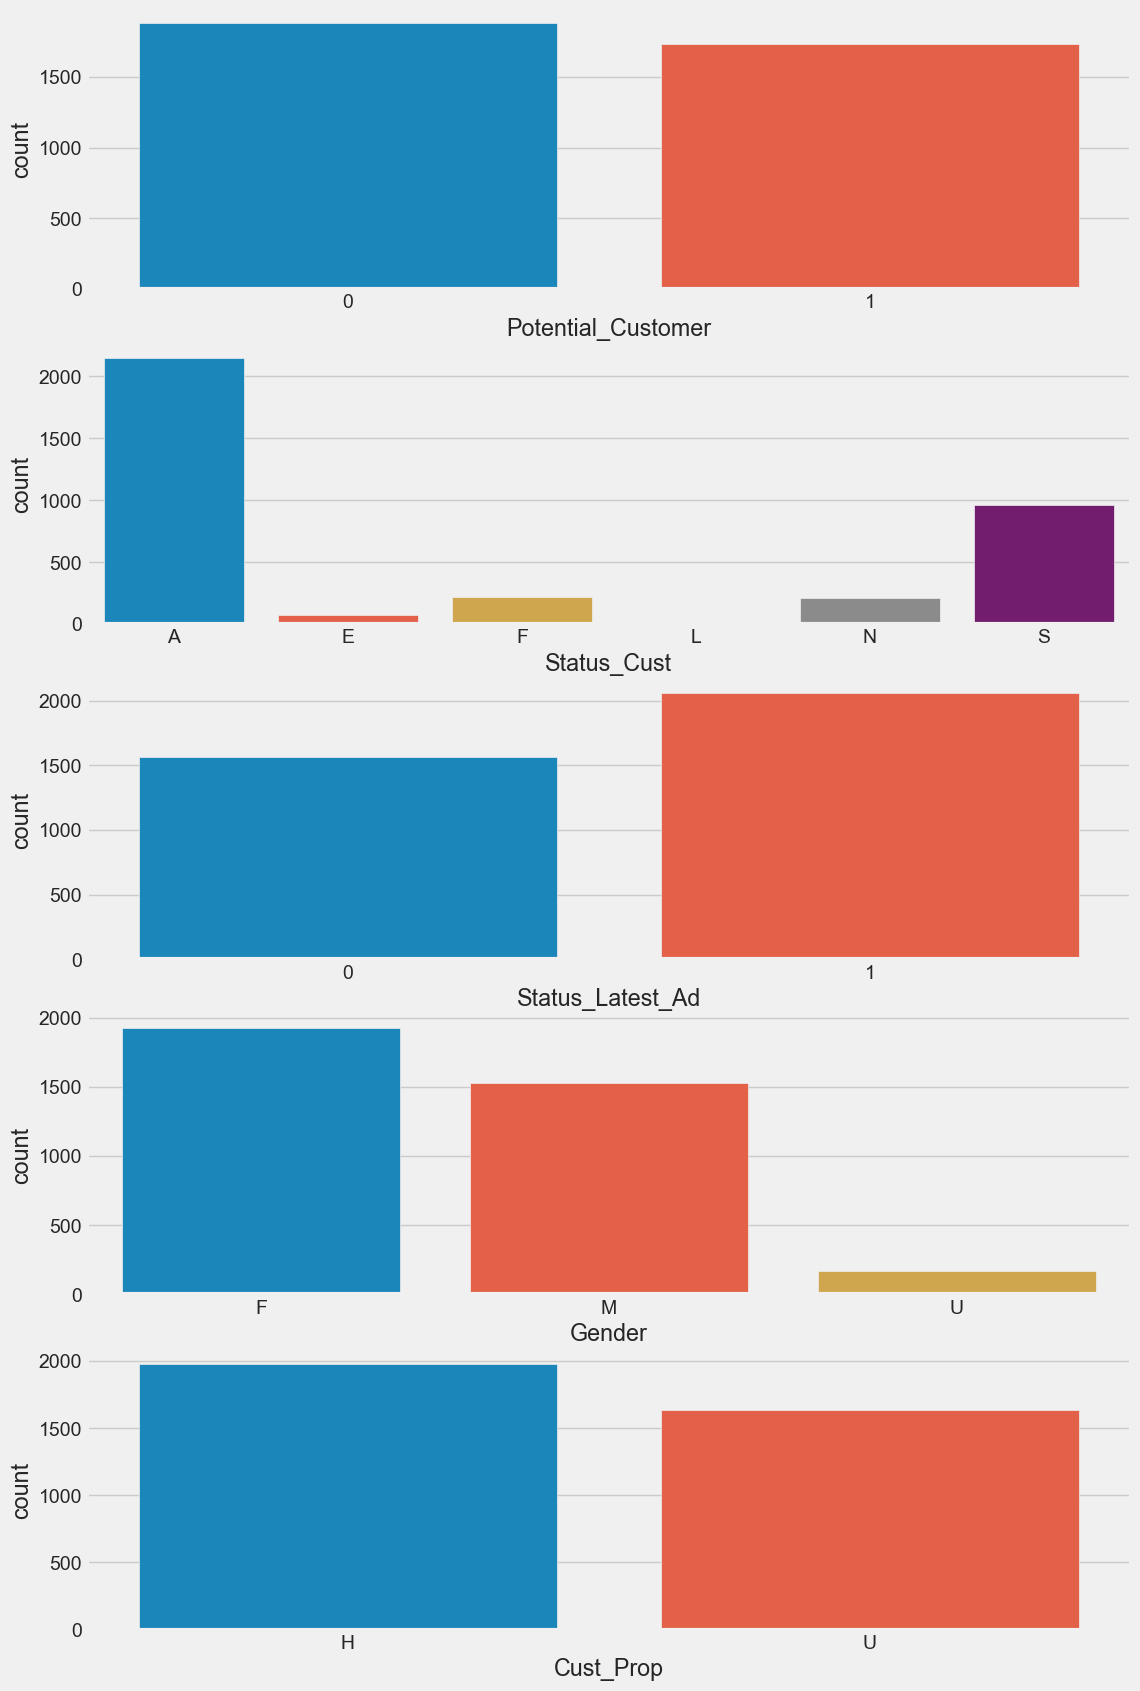

In [15]:
fig, ax=plt.subplots(nrows=len(CatCols), figsize=(12,20))
for i in np.arange(len(CatCols)): 
    sns.countplot(x=df[CatCols[i]],ax=ax[i]);

From the Bar plots below, we notice that `Status_Cust` has too many categories, with very small values. Hence, we'll using binning to reduce the number of categories. 

In [60]:
mapper = {'A':'A',
          'S':'S' ,
          'E': 'other', 
          'F': 'other',
          'N':'other',
          'L':'other' }

df['Status_Cust_new'] = df['Status_Cust'].replace(mapper)
CatCols = CatCols + ['Status_Cust_new']
CatCols.remove('Status_Cust')

## 3.2 Explore Continuous Variables

From the charts below, we glean the following insights: 
- Some variables are highly skewed and we may use the log of them after filling missing values with median or other appropriate values.
- Some variables have outliers we should decide to remove/fix/keep them.
- We notice some values are close to zero in the `Age` column, which signals us to investigate further.
- Some values in the `Cust_Ann_Income` column appear to be close to zero. This also signals us to investigate further. 

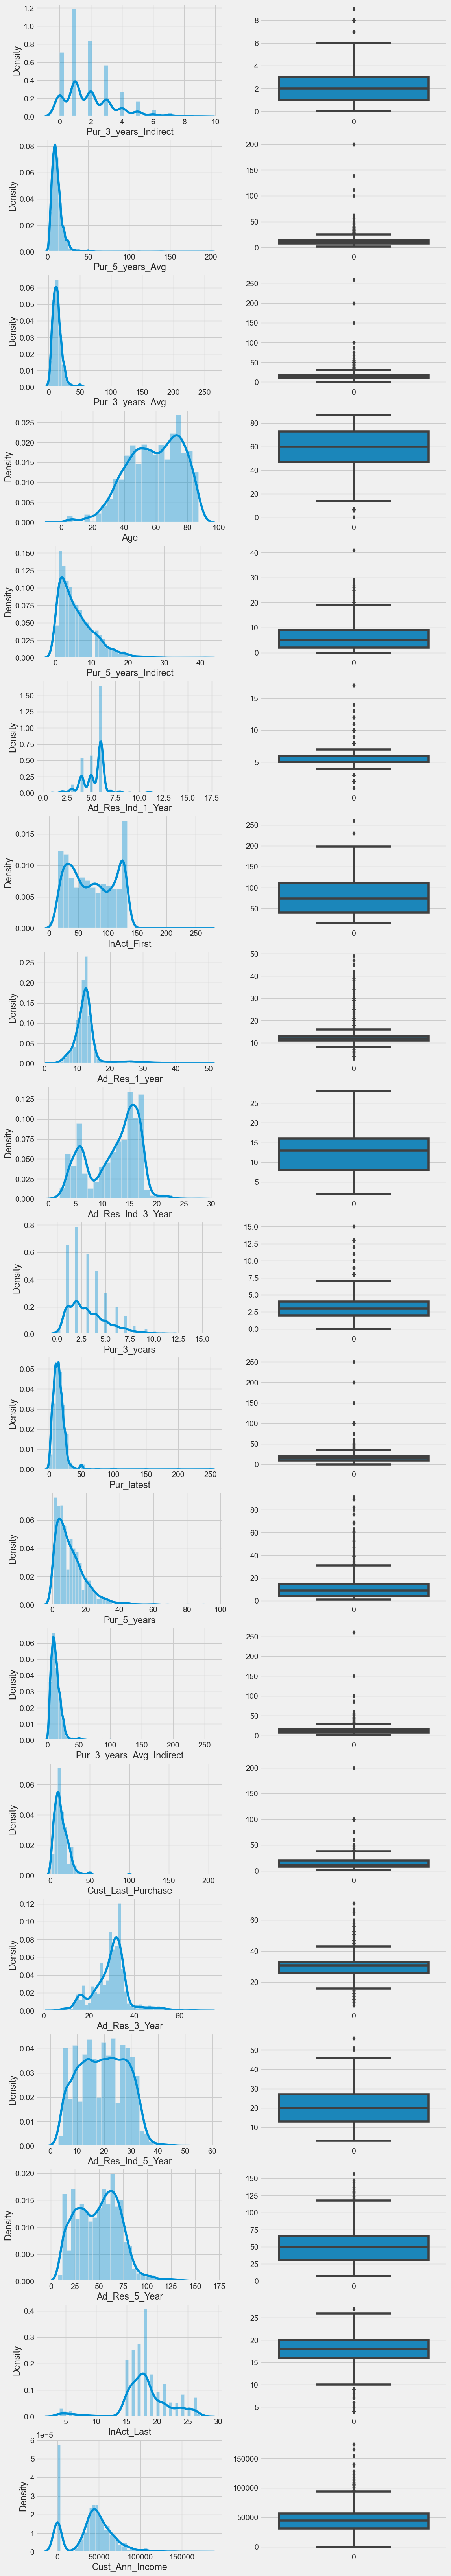

In [17]:
fig, ax=plt.subplots(nrows=len(NumCols), ncols=2, figsize=(12,80))
for i in range(len(NumCols)):
    sns.distplot(df[NumCols[i]],ax=ax[i,0])
    sns.boxplot(df[NumCols[i]],ax=ax[i,1]);

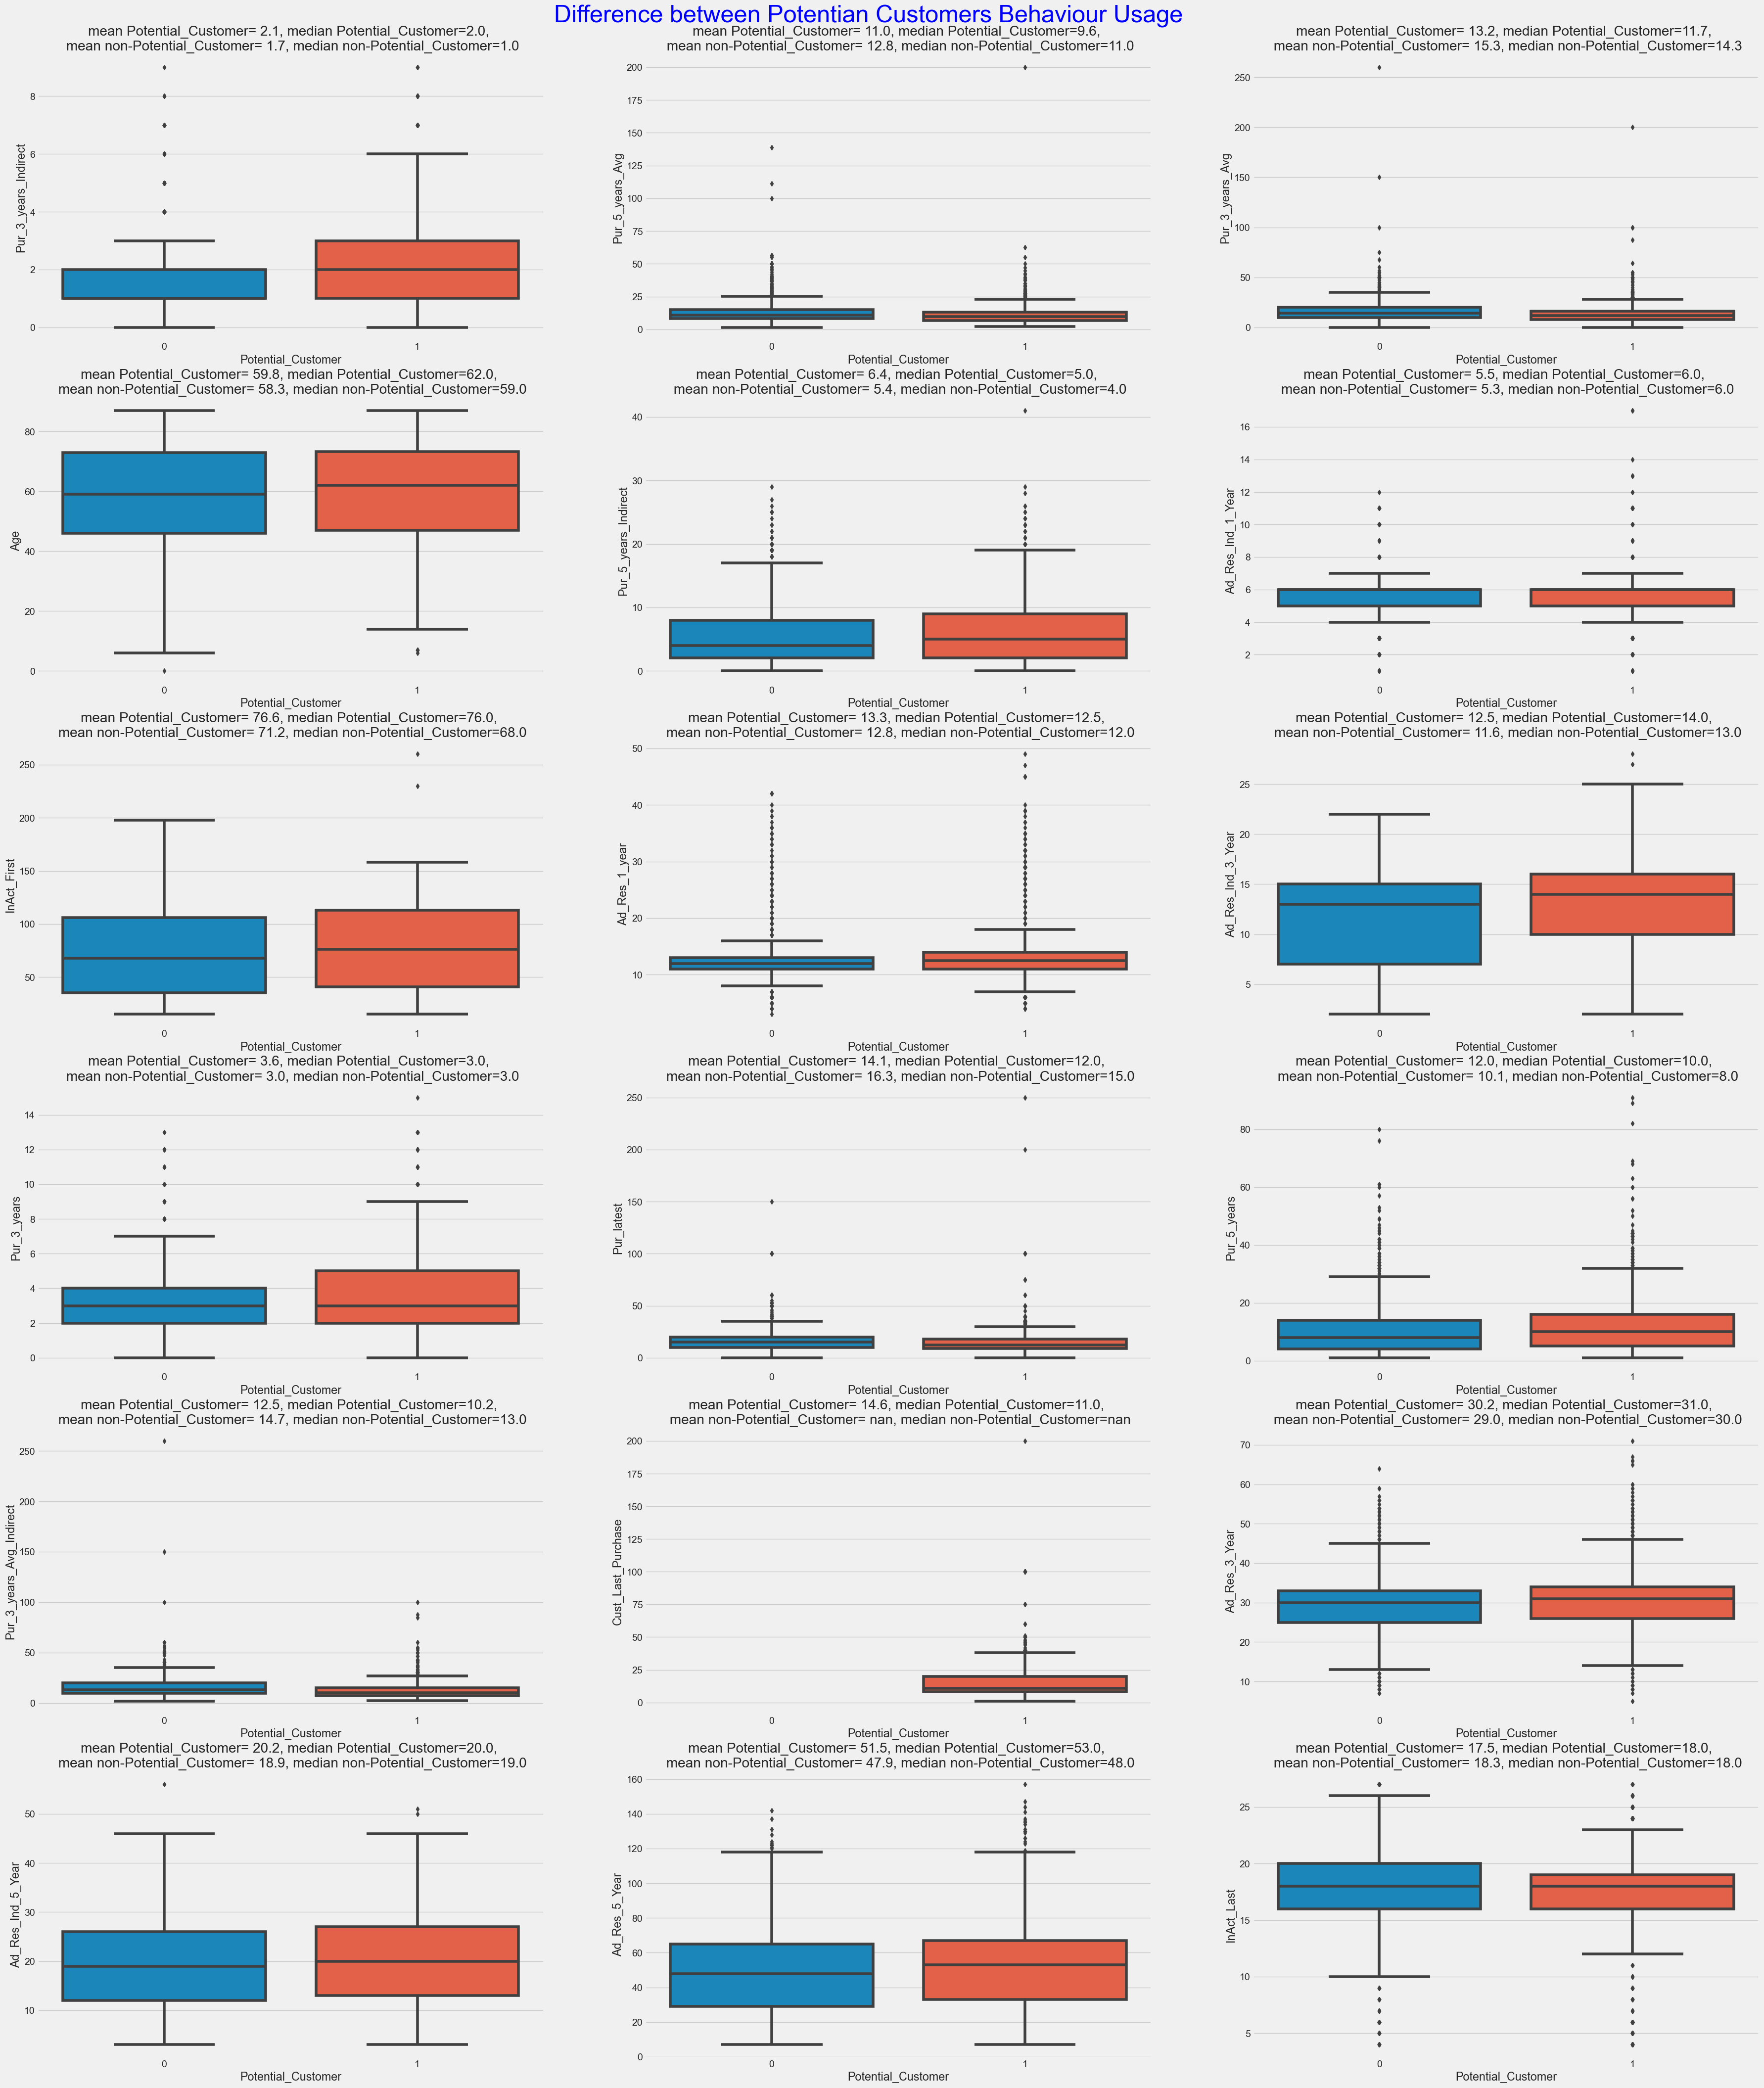

In [18]:
ncols=int(len(NumCols)/6)
fig , axes= plt.subplots(ncols=ncols, nrows=6, figsize=(40,50))
fig.suptitle('Difference between Potentian Customers Behaviour Usage',y=.9, fontsize=35, color='b')
for j in np.arange(0,6):
    for c in np.arange(0,ncols):
        sns.boxplot(x='Potential_Customer',y=df[NumCols[c+j*3]],data=df, ax=axes[j,c]).\
    set_title('mean Potential_Customer= {:.1f}, median Potential_Customer={:.1f}, \n mean non-Potential_Customer= {:.1f}, median non-Potential_Customer={:.1f}'.\
                             format(df[df.Potential_Customer==1][NumCols[c+j*3]].mean(), 
                                    df[df.Potential_Customer==1][NumCols[c+j*3]].median(),
                                    df[df.Potential_Customer==0][NumCols[c+j*3]].mean(), 
                                    df[df.Potential_Customer==0][NumCols[c+j*3]].median()))
plt.show()

# 4. Feature Engineering and Inspection

## 4.1 Feature Engineering

In [61]:
# Creating the total amount of purchase for the customers
df['Pur_5_years_Total']=df['Pur_5_years']*df['Pur_5_years_Avg']
df['Pur_3_years_Total']=df['Pur_3_years']*df['Pur_3_years_Avg']

# Creating the ad response rate
df['Ad_Res_Rate_3_years']=df['Pur_3_years']/(df['Ad_Res_3_Year']+df['Ad_Res_Ind_3_Year']+1)
df['Ad_Res_Rate_5_years']=df['Pur_5_years']/(df['Ad_Res_5_Year']+df['Ad_Res_Ind_5_Year']+1)

# Since some of our data is skewed, we'll employ logarithmic transformation to -
# transform the highly skewed variables to some more normalized variables.
df['log_Pur_3_years_Indirect']=np.log(df['Pur_3_years_Indirect']+1)
df['log_Pur_5_years_Indirect']=np.log(df['Pur_5_years_Indirect']+1)
df['log_Pur_latest']=np.log(df['Pur_latest']+1)
df['log_Pur_3_years']=np.log(df['Pur_3_years']+1)
df['log_Pur_5_years']=np.log(df['Pur_5_years']+1)
df['log_Pur_5_years_Total']=np.log(df['Pur_5_years_Total']+1)
df['log_Pur_3_years_Total']=np.log(df['Pur_3_years_Total']+1)
df['log_Pur_3_years_Avg_Indirect']=np.log(df['Pur_3_years_Avg_Indirect']+1)
df['log_Ad_Res_Rate_3_years']=np.log(df['Ad_Res_Rate_3_years']+1)
df['log_Ad_Res_Rate_5_years']=np.log(df['Ad_Res_Rate_5_years']+1)
df['log_Pur_3_years_Avg']=np.log(df['Pur_3_years_Avg']+1)
df['log_Pur_5_years_Avg']=np.log(df['Pur_5_years_Avg']+1)

NewCols=['Pur_3_years_Total', 'Pur_5_years_Total', 'Ad_Res_Rate_3_years', 'Ad_Res_Rate_5_years',
         'log_Pur_3_years_Indirect', 'log_Pur_5_years_Indirect','log_Pur_latest','log_Pur_3_years', 
         'log_Pur_5_years','log_Pur_5_years_Total', 'log_Pur_3_years_Total',
         'log_Pur_3_years_Avg_Indirect', 'log_Ad_Res_Rate_3_years', 'log_Ad_Res_Rate_5_years',
         'log_Pur_3_years_Avg', 'log_Pur_5_years_Avg']

NewNumCols=NewCols+NumCols

In [62]:
df[NewCols+['Potential_Customer']].groupby('Potential_Customer').median().T

Potential_Customer               0     1
Pur_3_years_Total            32.00 33.99
Pur_5_years_Total            79.97 85.00
Ad_Res_Rate_3_years           0.06  0.07
Ad_Res_Rate_5_years           0.11  0.14
log_Pur_3_years_Indirect      0.69  1.10
log_Pur_5_years_Indirect      1.61  1.79
log_Pur_latest                2.77  2.56
log_Pur_3_years               1.39  1.39
log_Pur_5_years               2.20  2.40
log_Pur_5_years_Total         4.39  4.45
log_Pur_3_years_Total         3.50  3.56
log_Pur_3_years_Avg_Indirect  2.64  2.42
log_Ad_Res_Rate_3_years       0.06  0.07
log_Ad_Res_Rate_5_years       0.11  0.13
log_Pur_3_years_Avg           2.73  2.54
log_Pur_5_years_Avg           2.48  2.36

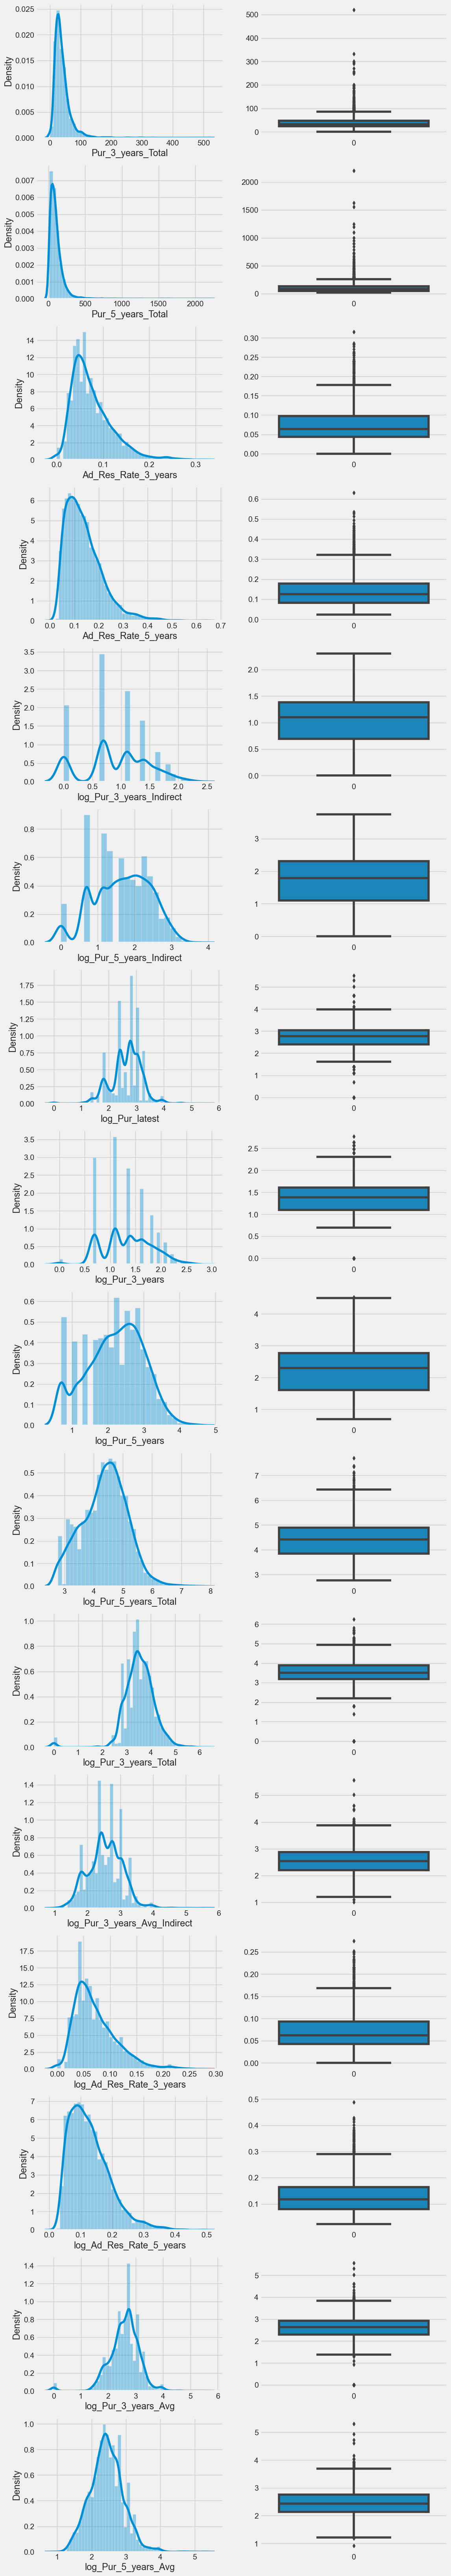

In [21]:
fig, ax=plt.subplots(nrows=len(NewCols), ncols=2, figsize=(12,80))
for i in range(len(NewCols)):
    sns.distplot(df[NewCols[i]],ax=ax[i,0])
    sns.boxplot(df[NewCols[i]],ax=ax[i,1]);

## 4.2 Correlation Matrix

We notice several highly correlated numerical features. Instead of manually removing them (which will take a long time!), we'll leave use Principal Component Analysis (PCA) to preprocess this. 

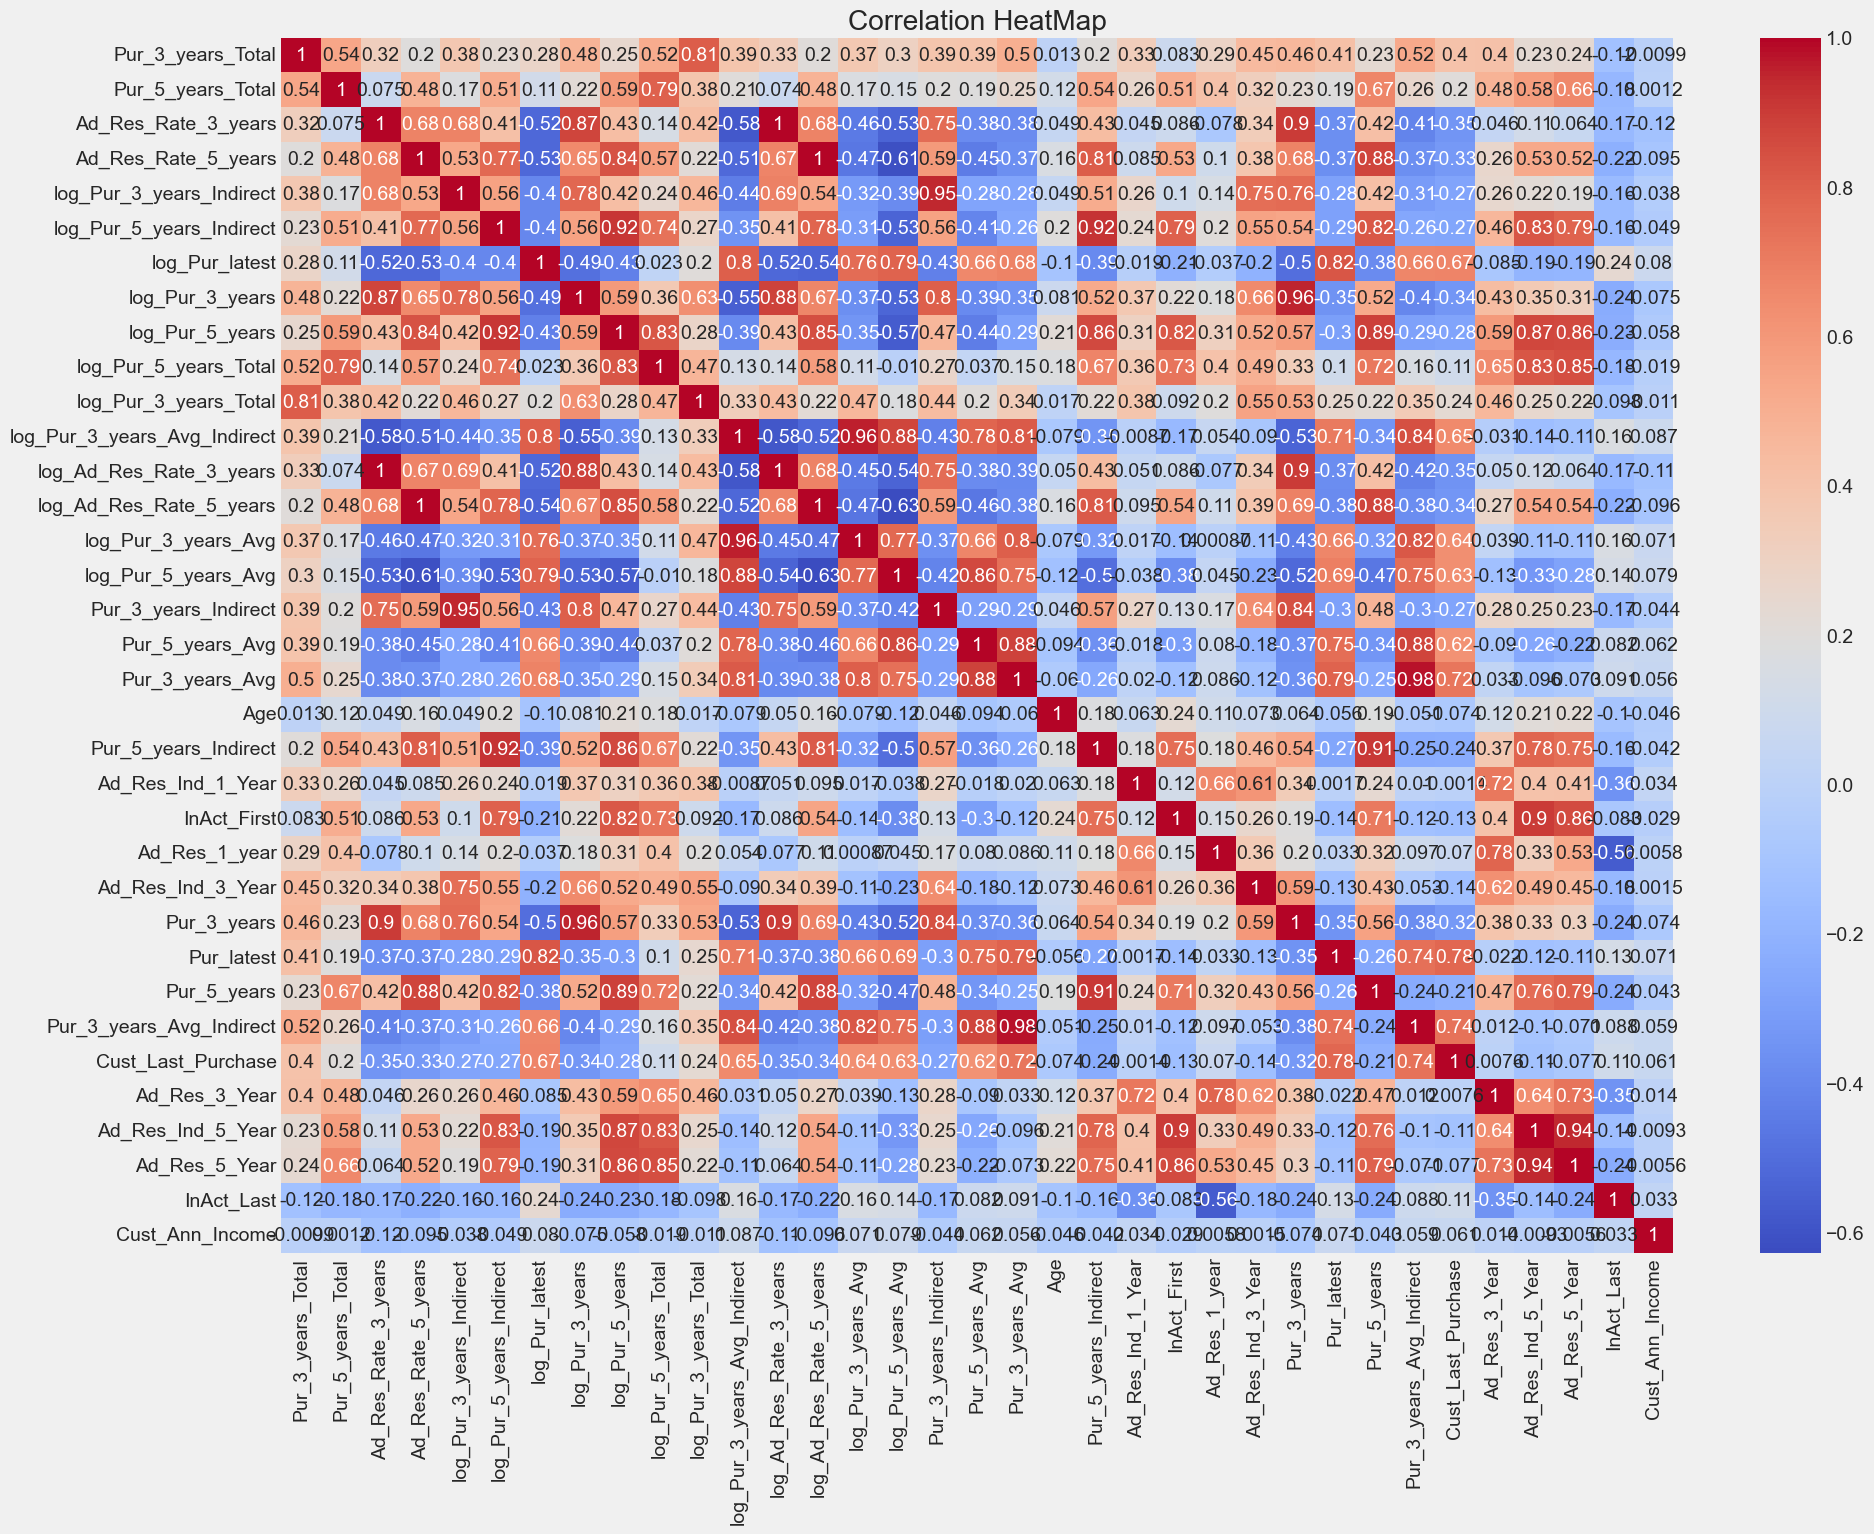

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(df[NewNumCols].corr(), cmap='coolwarm', annot=True, square=False)
plt.title('Correlation HeatMap');

# 5. Data Preprocessing

## 5.1 Split target (Y) and feature (X) variables

In [63]:
# Create list of the categorical features:
CatFes=list(set(CatCols)-set(['Potential_Customer']))

In [64]:
# Split Xs (features) and Y (target)

NewNumCols.remove('Cust_Last_Purchase')
Features=NewNumCols+CatFes
X=df[Features]
y=df['Potential_Customer']

## 5.2 Split data to train/test 

To avoid data leakage, we'll split the data into train and test sets before further preprocessing.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
                                 X, y, test_size=0.2, 
                                random_state=42, stratify=y)

# Check average purchase                                
avg_pur=df[(df.index.isin(X_train.index))&(df.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].mean()
avg_pur

14.556695464362852

## 5.3 Handle null values

In [66]:
# check which columns have null values. 
df.isna().sum()

Potential_Customer                 0
Cust_Last_Purchase              1882
Pur_3_years                        0
Pur_5_years                        0
Pur_3_years_Indirect               0
Pur_5_years_Indirect               0
Pur_latest                         0
Pur_3_years_Avg                    0
Pur_5_years_Avg                    0
Pur_3_years_Avg_Indirect         662
InAct_Last                         0
InAct_First                        0
Ad_Res_1_year                      0
Ad_Res_3_Year                      0
Ad_Res_5_Year                      0
Ad_Res_Ind_1_Year                  0
Ad_Res_Ind_3_Year                  0
Ad_Res_Ind_5_Year                  0
Status_Cust                        0
Status_Latest_Ad                   0
Age                              793
Gender                             0
Cust_Prop                          0
Cust_Ann_Income                    0
Status_Cust_new                    0
Pur_5_years_Total                  0
Pur_3_years_Total                  0
A

In [67]:
# impute with 0 or median. 
X_train.Pur_3_years_Avg_Indirect = X_train.Pur_3_years_Avg_Indirect.fillna(0)
X_test.Pur_3_years_Avg_Indirect = X_test.Pur_3_years_Avg_Indirect.fillna(0)

X_train.log_Pur_3_years_Avg_Indirect = X_train.log_Pur_3_years_Avg_Indirect.fillna(0)
X_test.log_Pur_3_years_Avg_Indirect = X_test.log_Pur_3_years_Avg_Indirect.fillna(0)

X_train.Age = X_train.Age.fillna(int(X_train.Age.median())).astype(int)
X_test.Age = X_test.Age.fillna(int(X_train.Age.median())).astype(int)

# final check for null values
X_train.isna().sum()

Pur_3_years_Total               0
Pur_5_years_Total               0
Ad_Res_Rate_3_years             0
Ad_Res_Rate_5_years             0
log_Pur_3_years_Indirect        0
log_Pur_5_years_Indirect        0
log_Pur_latest                  0
log_Pur_3_years                 0
log_Pur_5_years                 0
log_Pur_5_years_Total           0
log_Pur_3_years_Total           0
log_Pur_3_years_Avg_Indirect    0
log_Ad_Res_Rate_3_years         0
log_Ad_Res_Rate_5_years         0
log_Pur_3_years_Avg             0
log_Pur_5_years_Avg             0
Pur_3_years_Indirect            0
Pur_5_years_Avg                 0
Pur_3_years_Avg                 0
Age                             0
Pur_5_years_Indirect            0
Ad_Res_Ind_1_Year               0
InAct_First                     0
Ad_Res_1_year                   0
Ad_Res_Ind_3_Year               0
Pur_3_years                     0
Pur_latest                      0
Pur_5_years                     0
Pur_3_years_Avg_Indirect        0
Ad_Res_3_Year 

## 5.4 Create Dummy Variables

In [68]:
# dummy variables for categorical variables. 
X_train= pd.get_dummies(X_train, drop_first=True).reset_index(drop=True)
X_test= pd.get_dummies(X_test, drop_first=True).reset_index(drop=True)

## 5.5 Feature Scaling

In [69]:
# Power Transformer
scaler_pw=PowerTransformer().fit(X_train[NewNumCols])
X_train_pw=pd.DataFrame(scaler_pw.transform(X_train[NewNumCols]), columns=NewNumCols)
X_test_pw=pd.DataFrame(scaler_pw.transform(X_test[NewNumCols]), columns=NewNumCols)
X_train_pw.index=X_train.index
X_test_pw.index=X_test.index
train_pw=pd.concat([X_train_pw, X_train[['Cust_Prop_U', 'Status_Cust_new_S',
       'Status_Cust_new_other', 'Gender_M', 'Gender_U']]],axis=1)
test_pw=pd.concat([X_test_pw, X_test[['Cust_Prop_U', 'Status_Cust_new_S',
       'Status_Cust_new_other', 'Gender_M', 'Gender_U']]], axis=1)

In [70]:
# MinMax Scaler
scaler=MinMaxScaler().fit(X_train)
X_train_sc=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_sc=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## 6.6 Feature Selection (PCA)

In [71]:
# PCA on Numerical Columns only
train_PCA=X_train_sc[NewNumCols]
test_PCA=X_test_sc[NewNumCols]

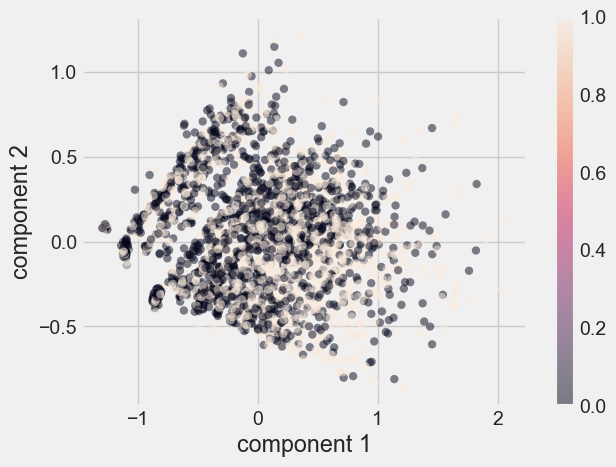

In [72]:
pca = PCA(2)  # project from 34 to 2 dimensions
projected = pca.fit_transform(train_PCA)
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

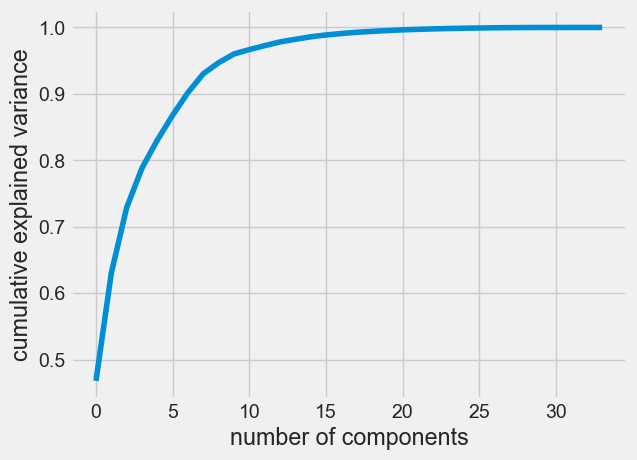

In [73]:
# We'll go with 15 as the ideal number of components after PCA
pca = PCA().fit(train_PCA)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [74]:
pca=PCA(n_components=15).fit(train_PCA)
PCA_train=pd.DataFrame(pca.transform(train_PCA))
PCA_train.index=X_train.index
PCA_test=pd.DataFrame(pca.transform(test_PCA))
PCA_test.index=X_test.index

X_train_pca=pd.concat([PCA_train, X_train[['Cust_Prop_U', 'Status_Cust_new_S',
       'Status_Cust_new_other', 'Gender_M', 'Gender_U']]], axis=1)
X_test_pca=pd.concat([PCA_test, X_test[['Cust_Prop_U', 'Status_Cust_new_S',
       'Status_Cust_new_other', 'Gender_M', 'Gender_U']]], axis=1)

# Model building (Machine Learning)

## 7.1 KNN, Logistic Regression, Decision Tree

In [94]:
def best_model(train,test,y_train,y_test, model, params,CV=3, **kwargs):
    param_grid = params
    grid = GridSearchCV(model, param_grid, cv=CV, 
                        scoring = 'roc_auc', return_train_score=True)
    grid.fit(train, y_train)
    best_par=grid.best_params_
    best_model = grid.best_estimator_.fit(train,y_train)
    pred=best_model.predict(test)
    F1 = f1_score(y_test, pred)
    best_sc = grid.best_score_
    conf_matrix=confusion_matrix(y_test, pred)
    report=classification_report(y_test, pred)
    return best_par, best_model, best_sc, F1,conf_matrix,report

In [95]:
train_list=[X_train, train_pw,X_train_pca]
test_list=[X_test,test_pw ,X_test_pca]
data_names=['normal', 'powertransform','pca_trans']

models=[KNeighborsClassifier(), DecisionTreeClassifier(), 
       LogisticRegression(solver='saga', max_iter=800)]

knn_param_grid = {'n_neighbors': np.arange(10, 50),
                  'weights':['uniform','distance'],
                  'p': [1,2]}

dt_param_grid = {'max_depth': np.arange(5, 20)}

lr_param_grid = {'C': [0.001, 0.01, 1, 10, 100],
                  'penalty' :['l1','l2']}

params=[knn_param_grid, dt_param_grid,  lr_param_grid]

In [97]:
results=pd.DataFrame({'model':[], 'data':[], 'best_m':[],'best_p':[],'best_sc':[],'TN':[],'FN':[],'FP':[],'TP':[],
                      'F1':[], 'value':[], 'revenue':[]})
i=0
c=5 #cost of ad
for m,p in zip(models, params):
    for tr,te,name in zip(train_list, test_list,data_names ):
        results.loc[i,'model']=str(m)
        results.loc[i,'data']=str(name)
        best_m,best_p,best_sc,F1,conf_matrix,report=best_model(tr,te,y_train,y_test, m, p,CV=3)
        results.loc[i,'best_m']=str(best_m)
        results.loc[i,'best_p']=str(best_p)
        results.loc[i,'best_sc']=round(best_sc,2)
        results.loc[i,'F1']=round(F1,2)
        results.loc[i,'TN']=conf_matrix[0,0]
        results.loc[i,'FN']=conf_matrix[0,1]
        results.loc[i,'FP']=conf_matrix[1,0]
        results.loc[i,'TP']=conf_matrix[1,1]
        cost=(conf_matrix[1,0]+conf_matrix[1,1])*c
        lost=conf_matrix[0,1]*avg_pur
        gain=conf_matrix[1,1]*avg_pur
        value=gain-cost-lost
        revenue= gain-cost
        results.loc[i,'value']=round(value,2)
        results.loc[i,'revenue']=round(revenue)
        print('data: {}\nbest model: {}\nbest param: {}\nbest score = {:.2f}, F1 = {:.2f}\nconfusion matrix: \n{}\
        \n classification report: \n{}\n value: {:.2f} \n revenue: {:.2f}'.\
             format(str(name),best_m,best_p,best_sc,F1,conf_matrix,report,value,revenue))
        print('\n***********************************\n')
        i=i+1

data: normal
best model: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
best param: KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')
best score = 0.52, F1 = 0.47
confusion matrix: 
[[191 186]
 [181 166]]        
 classification report: 
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       377
           1       0.47      0.48      0.47       347

    accuracy                           0.49       724
   macro avg       0.49      0.49      0.49       724
weighted avg       0.49      0.49      0.49       724

 value: -2026.13 
 revenue: 681.41

***********************************

data: powertransform
best model: {'n_neighbors': 48, 'p': 2, 'weights': 'distance'}
best param: KNeighborsClassifier(n_neighbors=48, weights='distance')
best score = 0.58, F1 = 0.51
confusion matrix: 
[[231 146]
 [179 168]]        
 classification report: 
              precision    recall  f1-score   support

           0       0.56      0.61 

## 7.2 XgBoost

In [98]:
def best_model(train,test,y_train,y_test, model, params,CV=3, **kwargs):
    param_grid = params
    stf_kf=StratifiedKFold(n_splits=5)
    rscv = RandomizedSearchCV(model,
                            param_distributions=param_grid,
                            cv=stf_kf,
                            n_jobs=-1,
                            scoring='roc_auc')
    rscv.fit(train, y_train)
    best_par=rscv.best_params_
    best_model = rscv.best_estimator_.fit(train,y_train)
    pred=best_model.predict(test)
    F1 = f1_score(y_test, pred)
    best_sc = rscv.best_score_
    conf_matrix=confusion_matrix(y_test, pred)
    report=classification_report(y_test, pred)
    return best_par, best_model, best_sc, F1,conf_matrix,report

In [99]:
train_list=[X_train, train_pw,X_train_pca]
test_list=[X_test,test_pw ,X_test_pca]
data_names=['normal', 'powertransform','pca_trans']

models= [xgb.XGBClassifier(n_estimators=50,n_jobs=-1)]

xgb_param_grid = {
         'learning_rate': np.arange(0.01, 0.11, 0.025),
         'max_depth': np.arange(1, 10, 1),
         'min_child_weight': np.arange(1, 10, 1), 
         'subsample': np.arange( 0.7, 1, 0.05), 
         'gamma': np.arange(0.5, 1, 0.1), 
         'colsample_bytree': np.arange( 0.1, 1, 0.05)
         }

params = [xgb_param_grid]

In [100]:
results=pd.DataFrame({'model':[], 'data':[], 'best_m':[],'best_p':[],'best_sc':[],'TN':[],'FN':[],'FP':[],'TP':[],
                      'F1':[], 'value':[], 'revenue':[]})
i=0
c=5 #cost of ad
for m,p in zip(models, params):
    for tr,te,name in zip(train_list, test_list,data_names ):
        results.loc[i,'model']=str(m)
        results.loc[i,'data']=str(name)
        best_m,best_p,best_sc,F1,conf_matrix,report=best_model(tr,te,y_train,y_test, m, p,CV=3)
        results.loc[i,'best_m']=str(best_m)
        results.loc[i,'best_p']=str(best_p)
        results.loc[i,'best_sc']=round(best_sc,2)
        results.loc[i,'F1']=round(F1,2)
        results.loc[i,'TN']=conf_matrix[0,0]
        results.loc[i,'FN']=conf_matrix[0,1]
        results.loc[i,'FP']=conf_matrix[1,0]
        results.loc[i,'TP']=conf_matrix[1,1]
        cost=(conf_matrix[1,0]+conf_matrix[1,1])*c
        lost=conf_matrix[0,1]*avg_pur
        gain=conf_matrix[1,1]*avg_pur
        value=gain-cost-lost
        revenue= gain-cost
        results.loc[i,'value']=round(value,2)
        results.loc[i,'revenue']=round(revenue)
        print('data: {}\nbest model: {}\nbest param: {}\nbest score = {:.2f}, F1 = {:.2f}\nconfusion matrix: \n{}\
        \n classification report: \n{}\n value: {:.2f} \n revenue: {:.2f}'.\
             format(str(name),best_m,best_p,best_sc,F1,conf_matrix,report,value,revenue))
        print('\n***********************************\n')
        i=i+1

data: normal
best model: {'subsample': 0.8500000000000001, 'min_child_weight': 8, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.6, 'colsample_bytree': 0.9500000000000003}
best param: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.9500000000000003, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.6, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_threshold=64,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=8, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, ...)
best score = 0.60, F1 = 0.49
confusion matrix: 
[[265 112]
 [197 150]]   

# Best ML Model vs Default Solution

From the above testing, our best solution is the model with the following parameters, yielding the following scores: 
 
- **data**: powertransform
- **best model**: {'n_neighbors': 48, 'p': 2, 'weights': 'distance'}  
- **best param**: KNeighborsClassifier(n_neighbors=48, weights='distance')  
- **best roc_auc score** = 0.58  
- **F1** = 0.51
- **confusion matrix**:  
                    [[231 146]  
                    [179 168]]        
- **value**: -1414.75 
- **revenue**: 710.52

We'll now compare our best models' revenue with the revenue of the default solution which is sending advertisement to all the customers in X_test.

In [93]:
default_revenue = df[df.index.isin(X_test.index)].Cust_Last_Purchase.sum()-c*len(X_test)
default_revenue

1463.0